<a href="https://colab.research.google.com/github/Arshan2898/SET-PROJECT-1--2023/blob/main/SET_PROJECT_REV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/OnlineNewsPopularity.csv')
data.head()
data.shape

(39644, 61)

In [ ]:
data2=data.drop(['url'],axis=1)
data2.head()
data2.shape

(39644, 60)

In [ ]:
data3=data2.drop([' timedelta'],axis=1)
data3.head()
#data3.columns
data3.shape

(39644, 59)

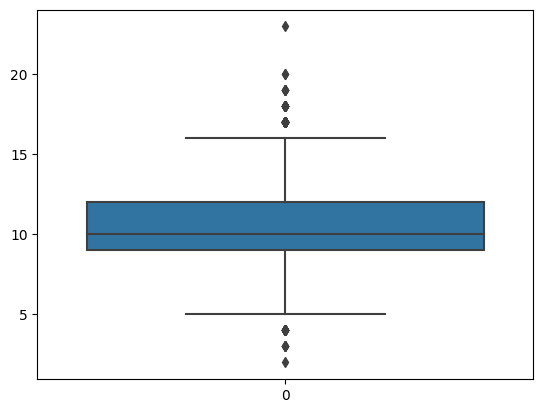

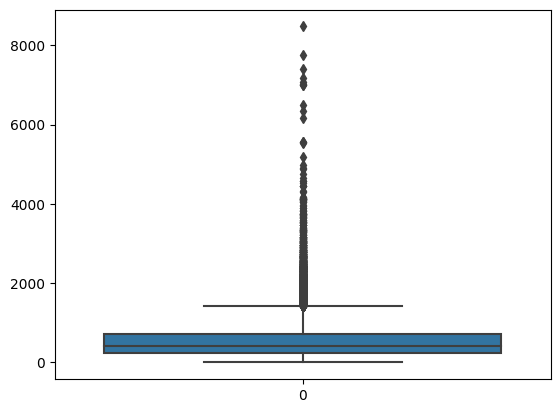

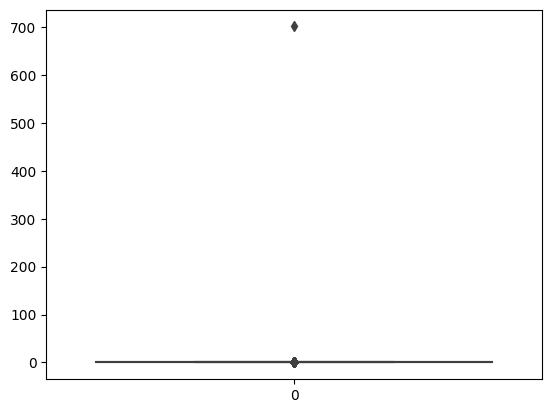

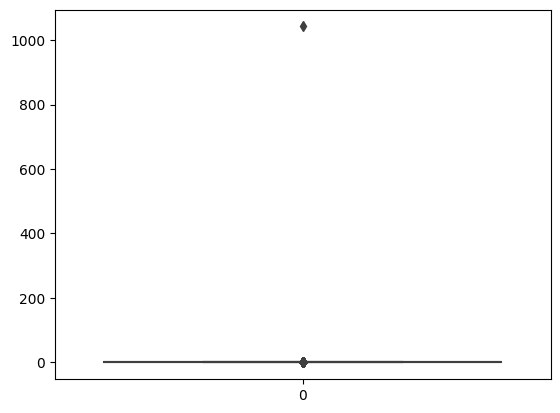

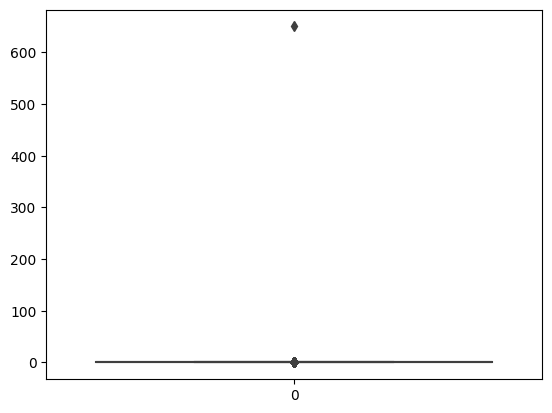

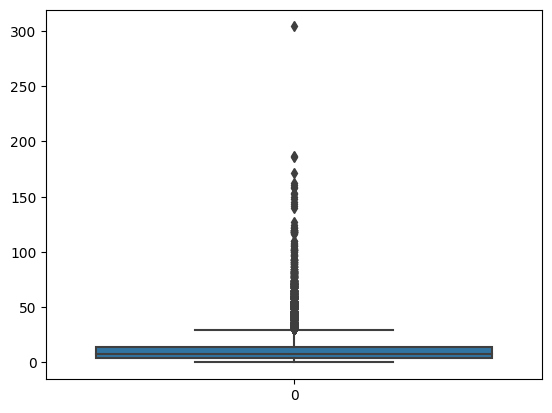

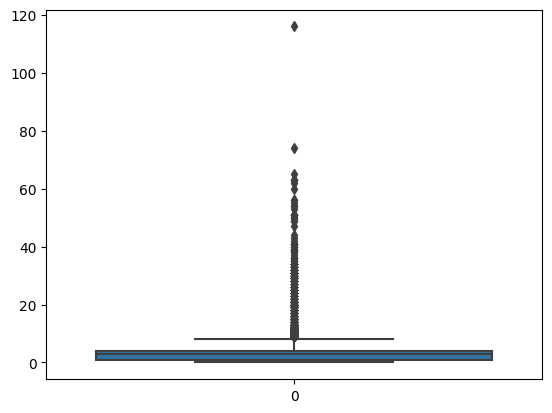

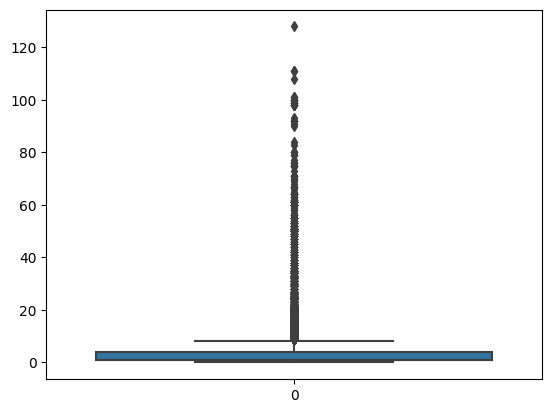

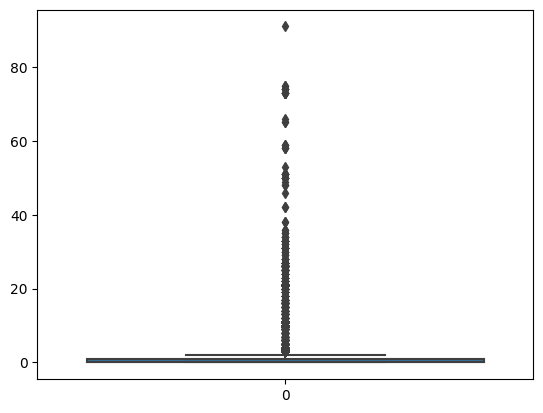

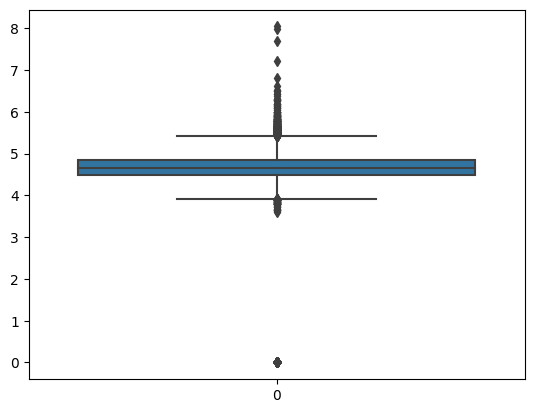

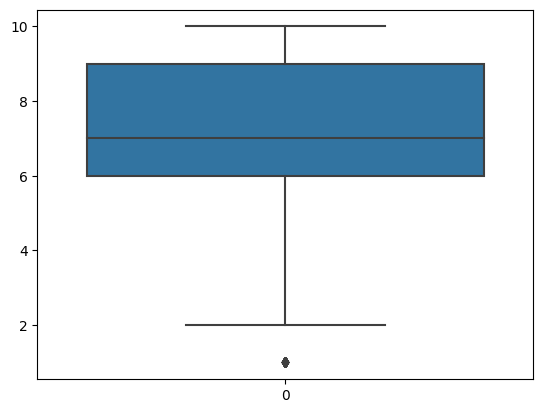

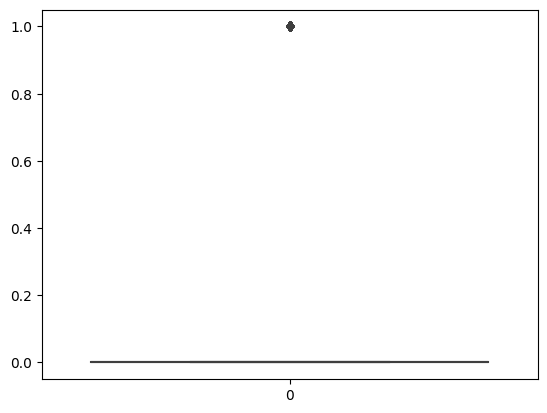

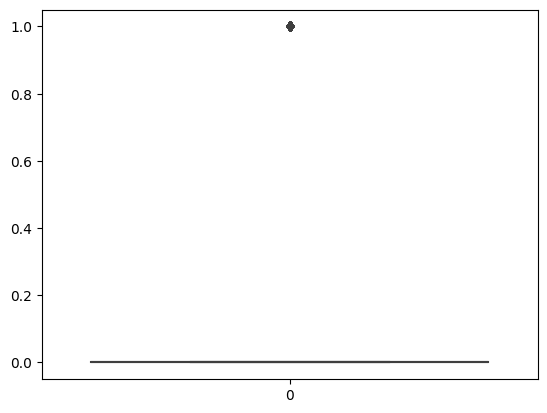

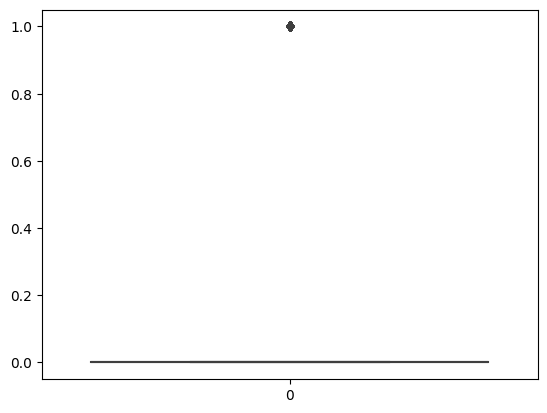

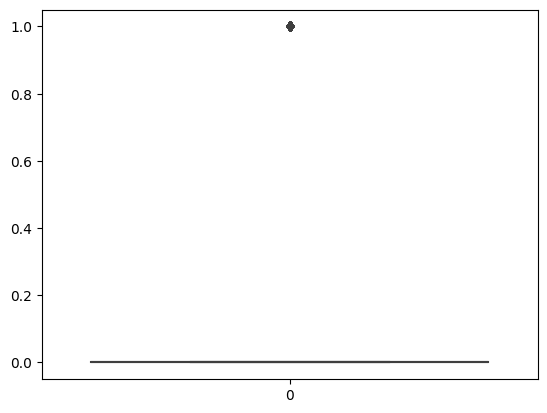

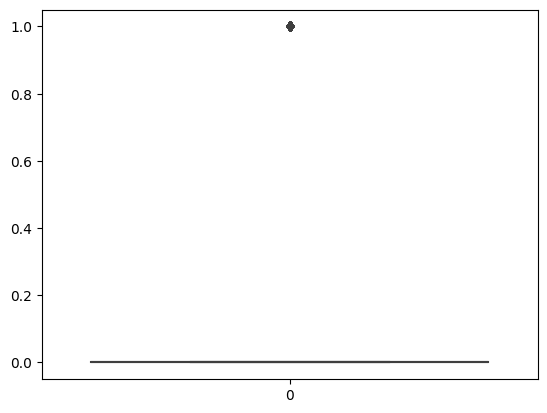

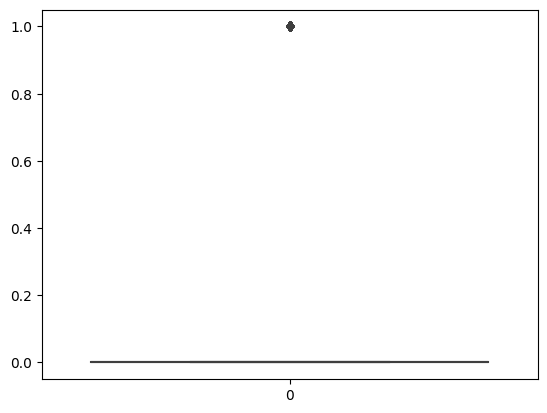

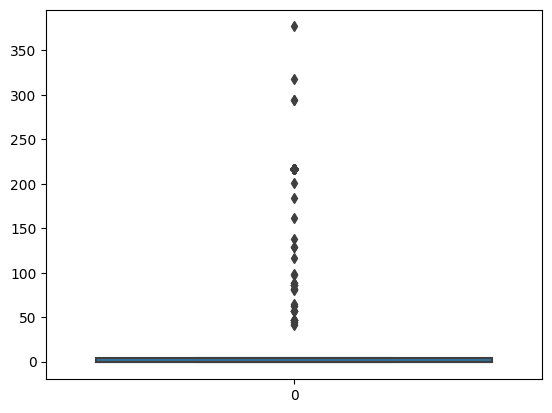

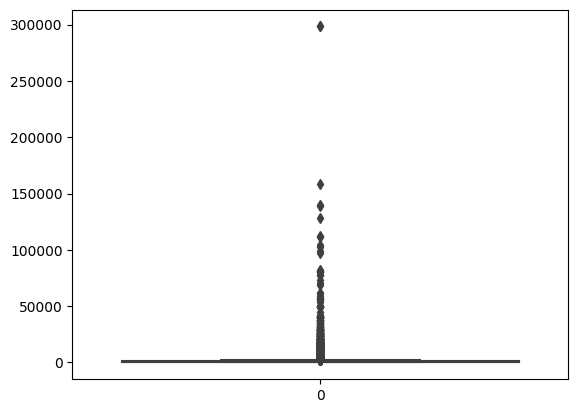

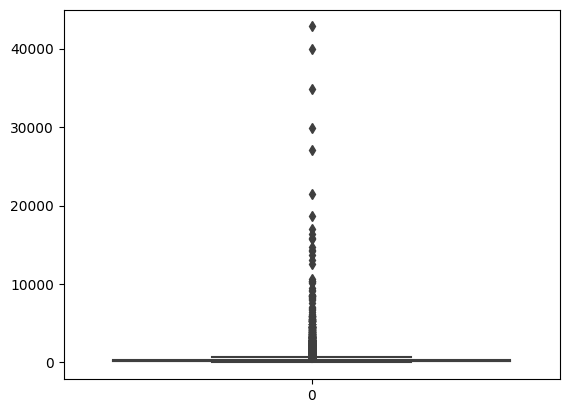

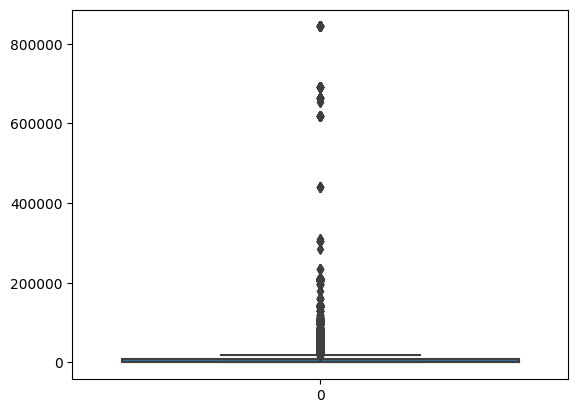

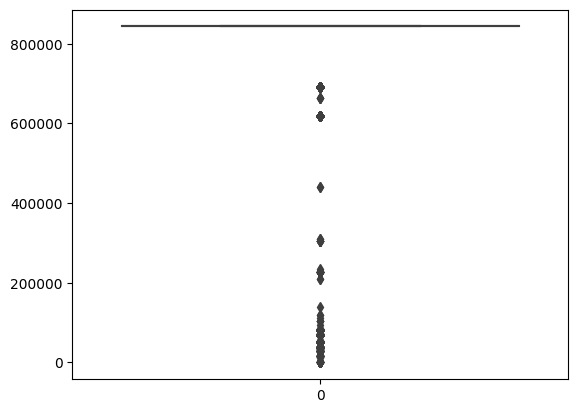

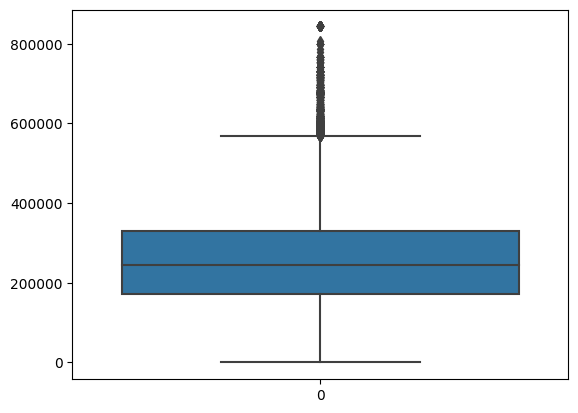

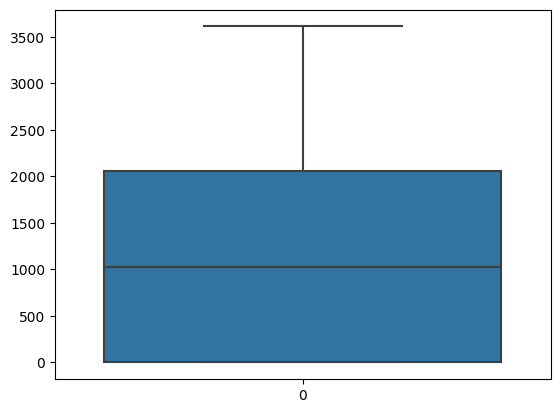

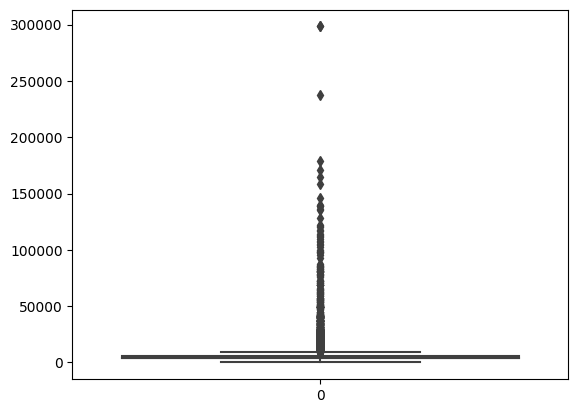

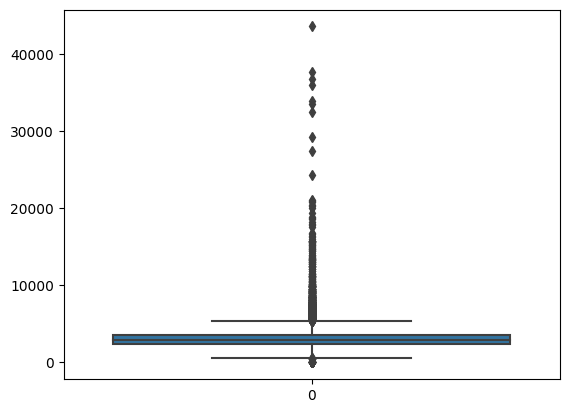

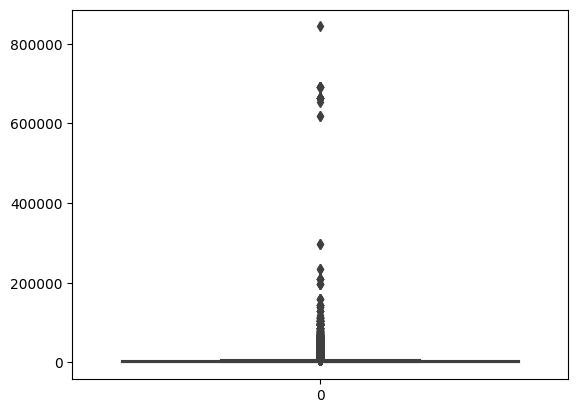

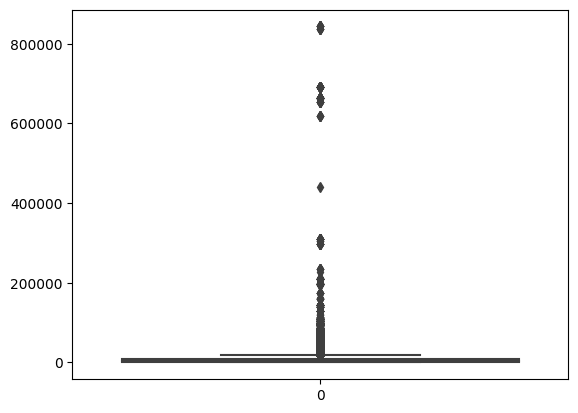

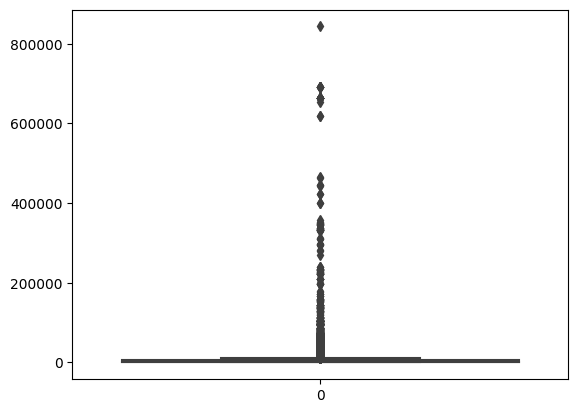

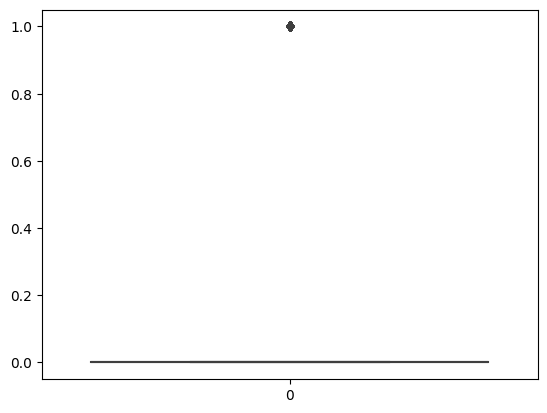

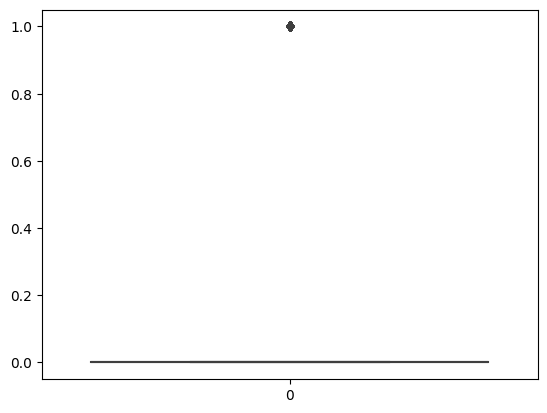

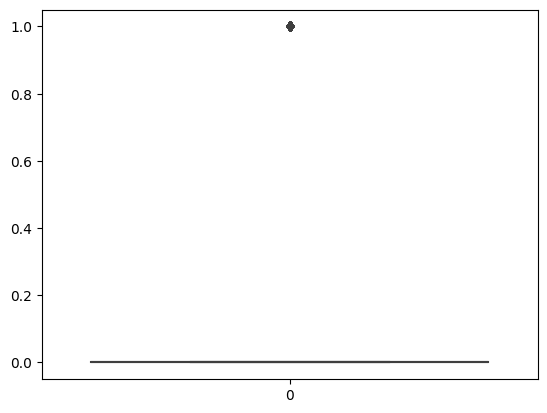

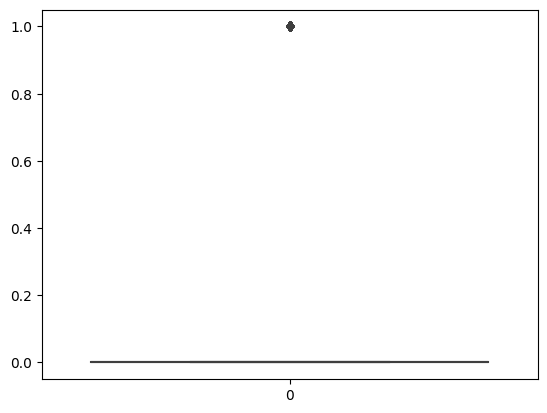

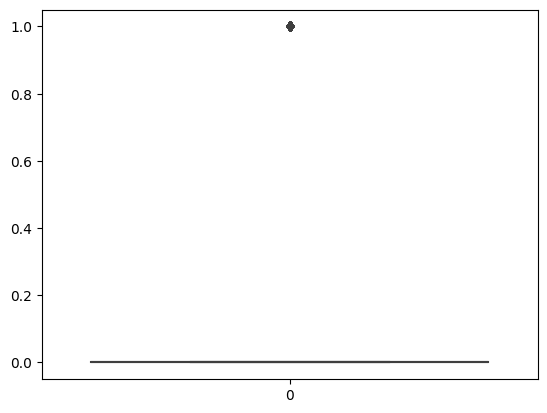

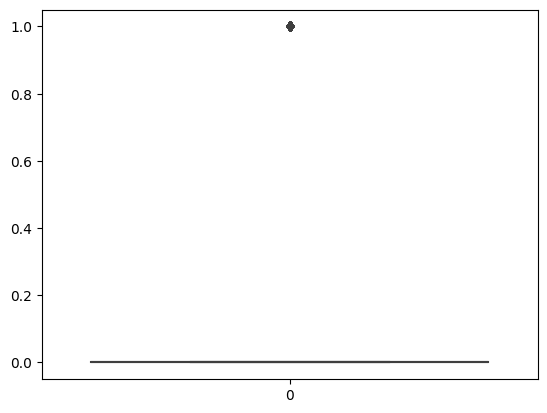

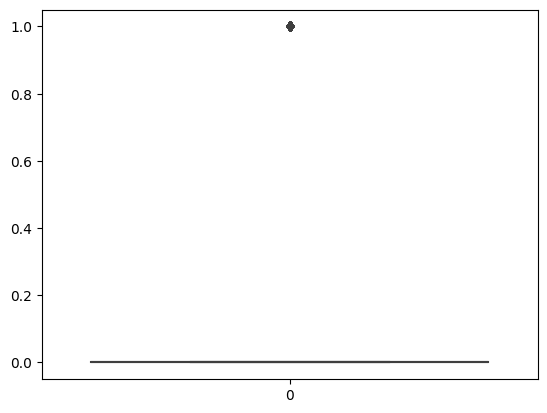

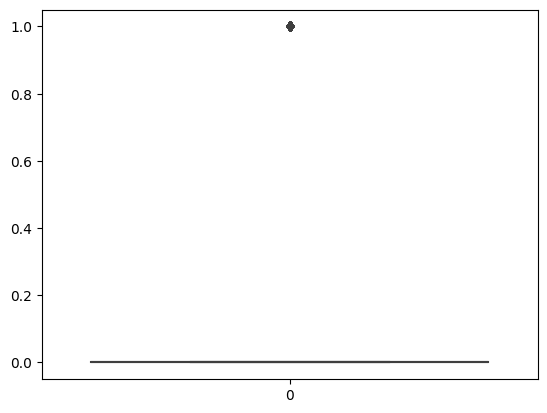

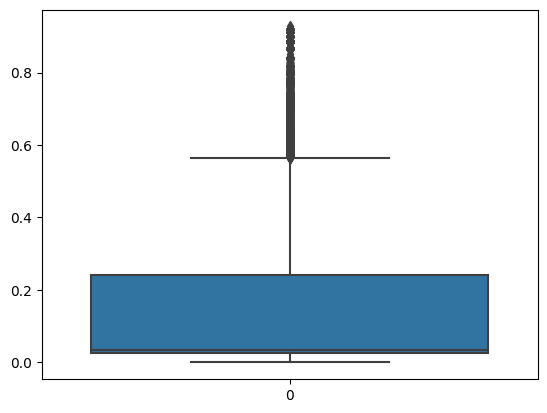

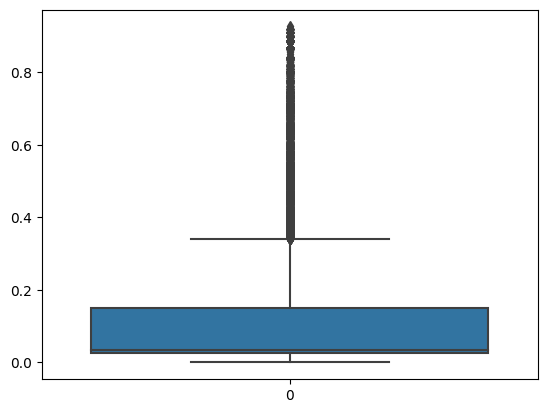

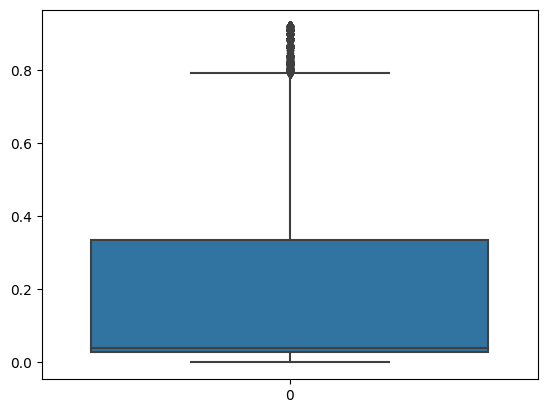

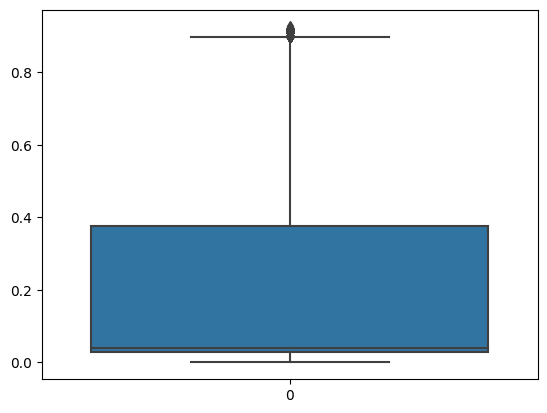

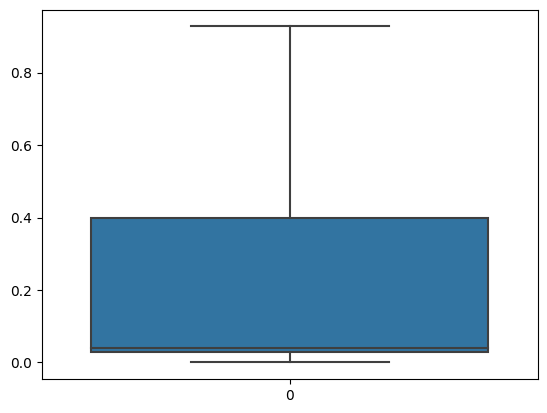

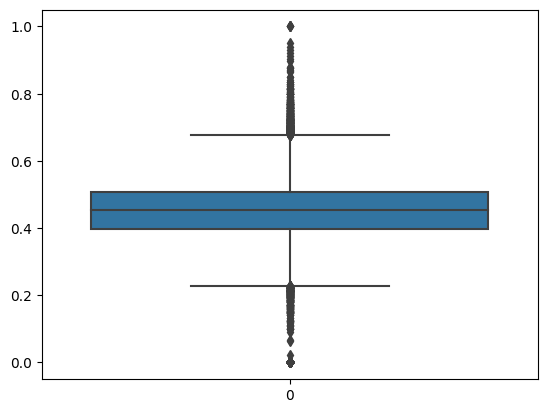

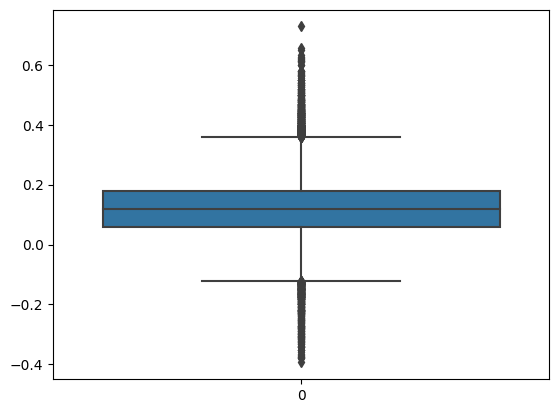

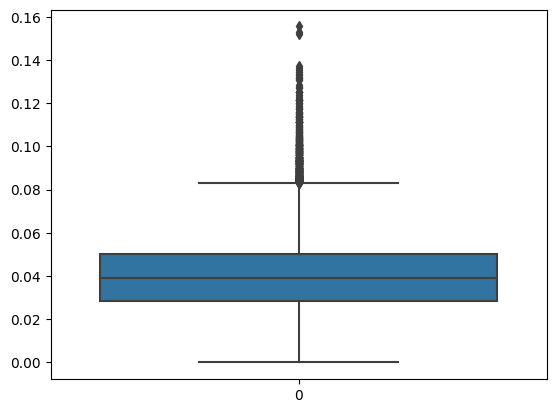

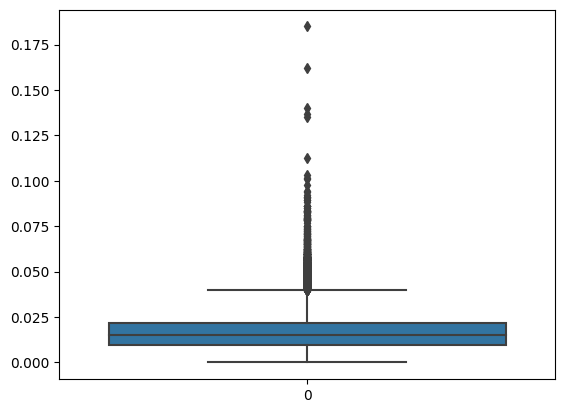

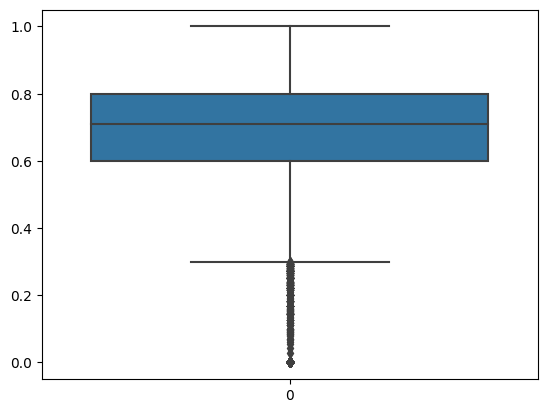

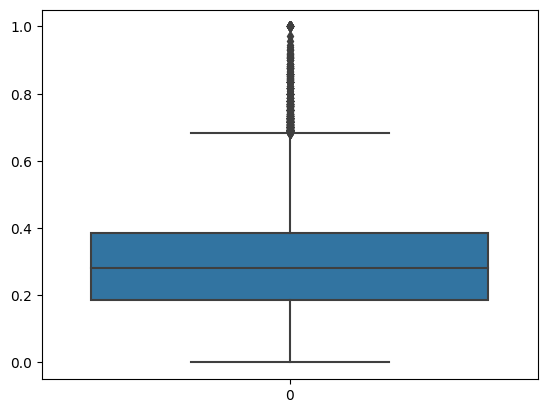

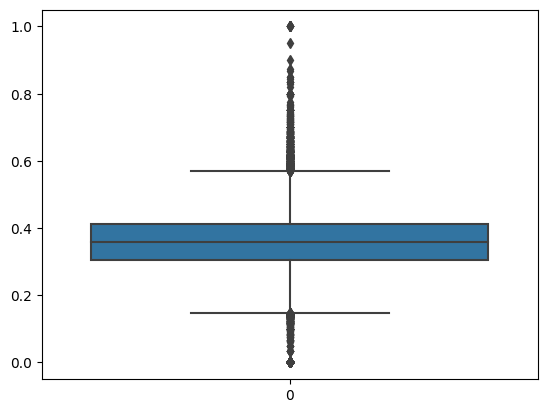

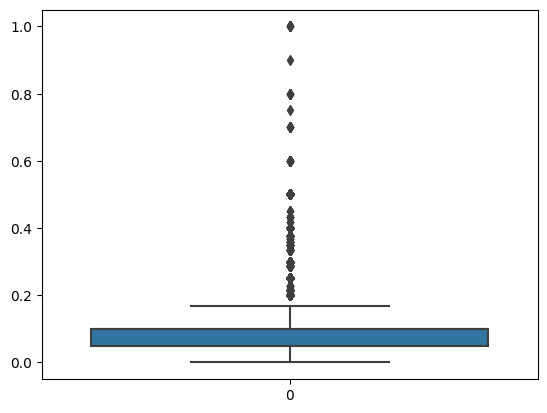

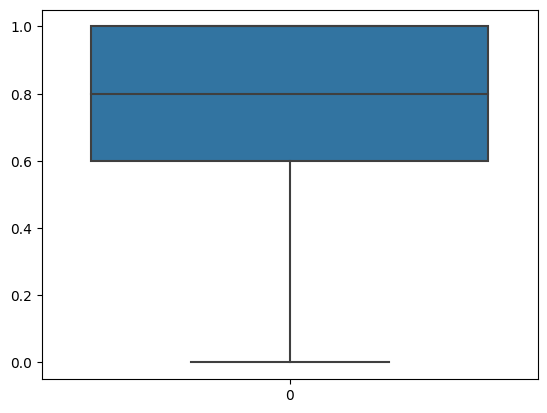

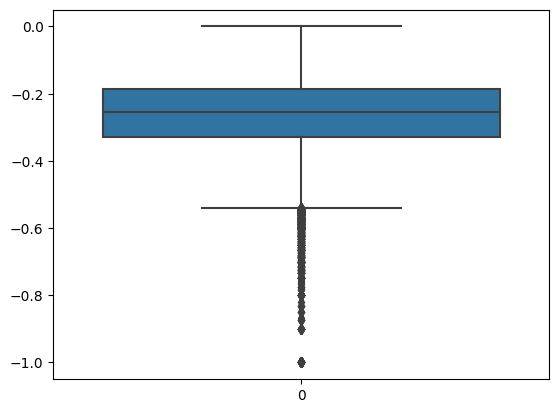

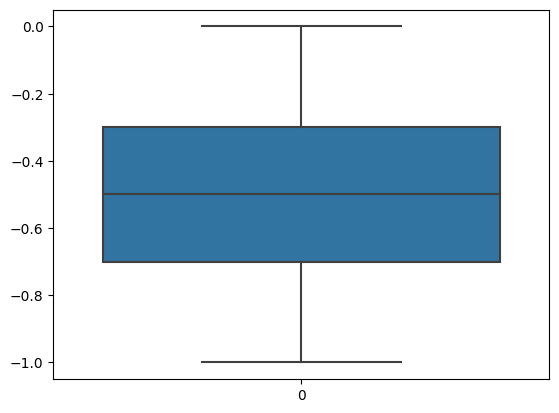

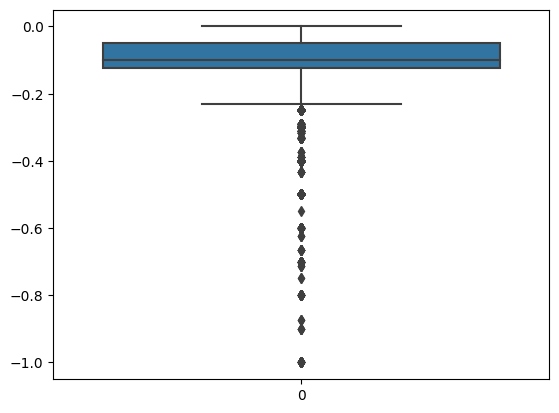

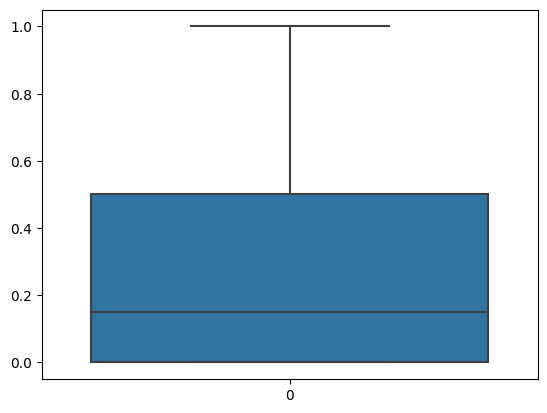

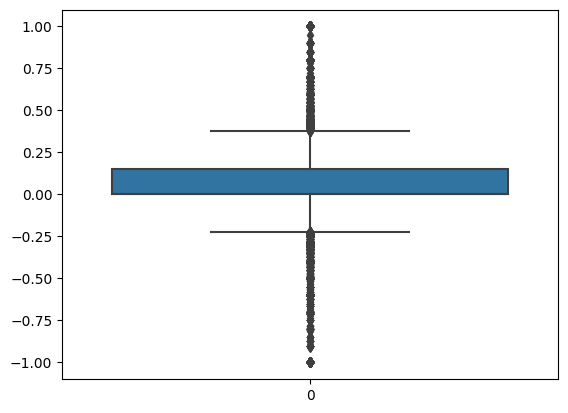

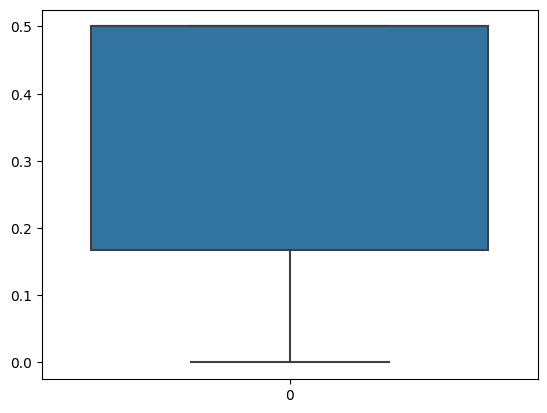

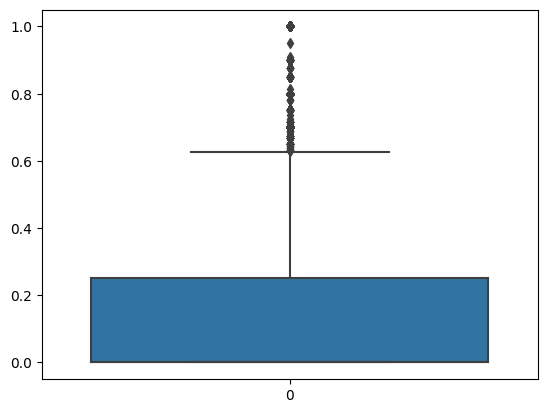

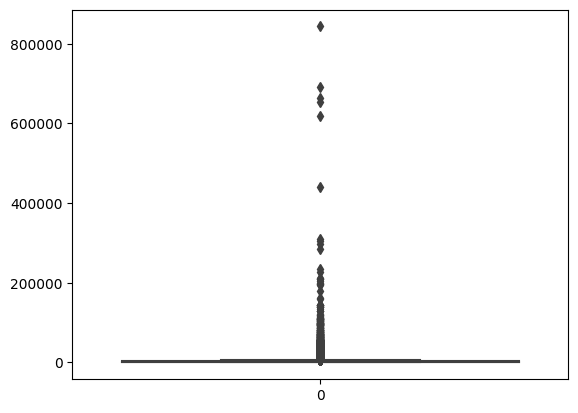

In [ ]:
for i in data3.columns:
  sns.boxplot(data3[i])
  plt.show()


In [ ]:
q1=data3[' shares'].quantile(0.25)
q3=data3[' shares'].quantile(0.75)
iqr=q3-q1

lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower,upper)

-1835.0 5581.0


In [ ]:
Data=data3[data3[' shares']<=upper]
print(data3.shape)
print(Data.shape)

(39644, 59)
(35103, 59)


In [ ]:
Data.describe()
Data.shape
#Data = Data.drop(" kw_avg_min",axis= 1)
#Data = Data.drop(" n_non_stop_unique_tokens",axis= 1)
Data = Data.drop(" n_non_stop_words",axis= 1)
Data.shape

(35103, 56)

<Axes: >

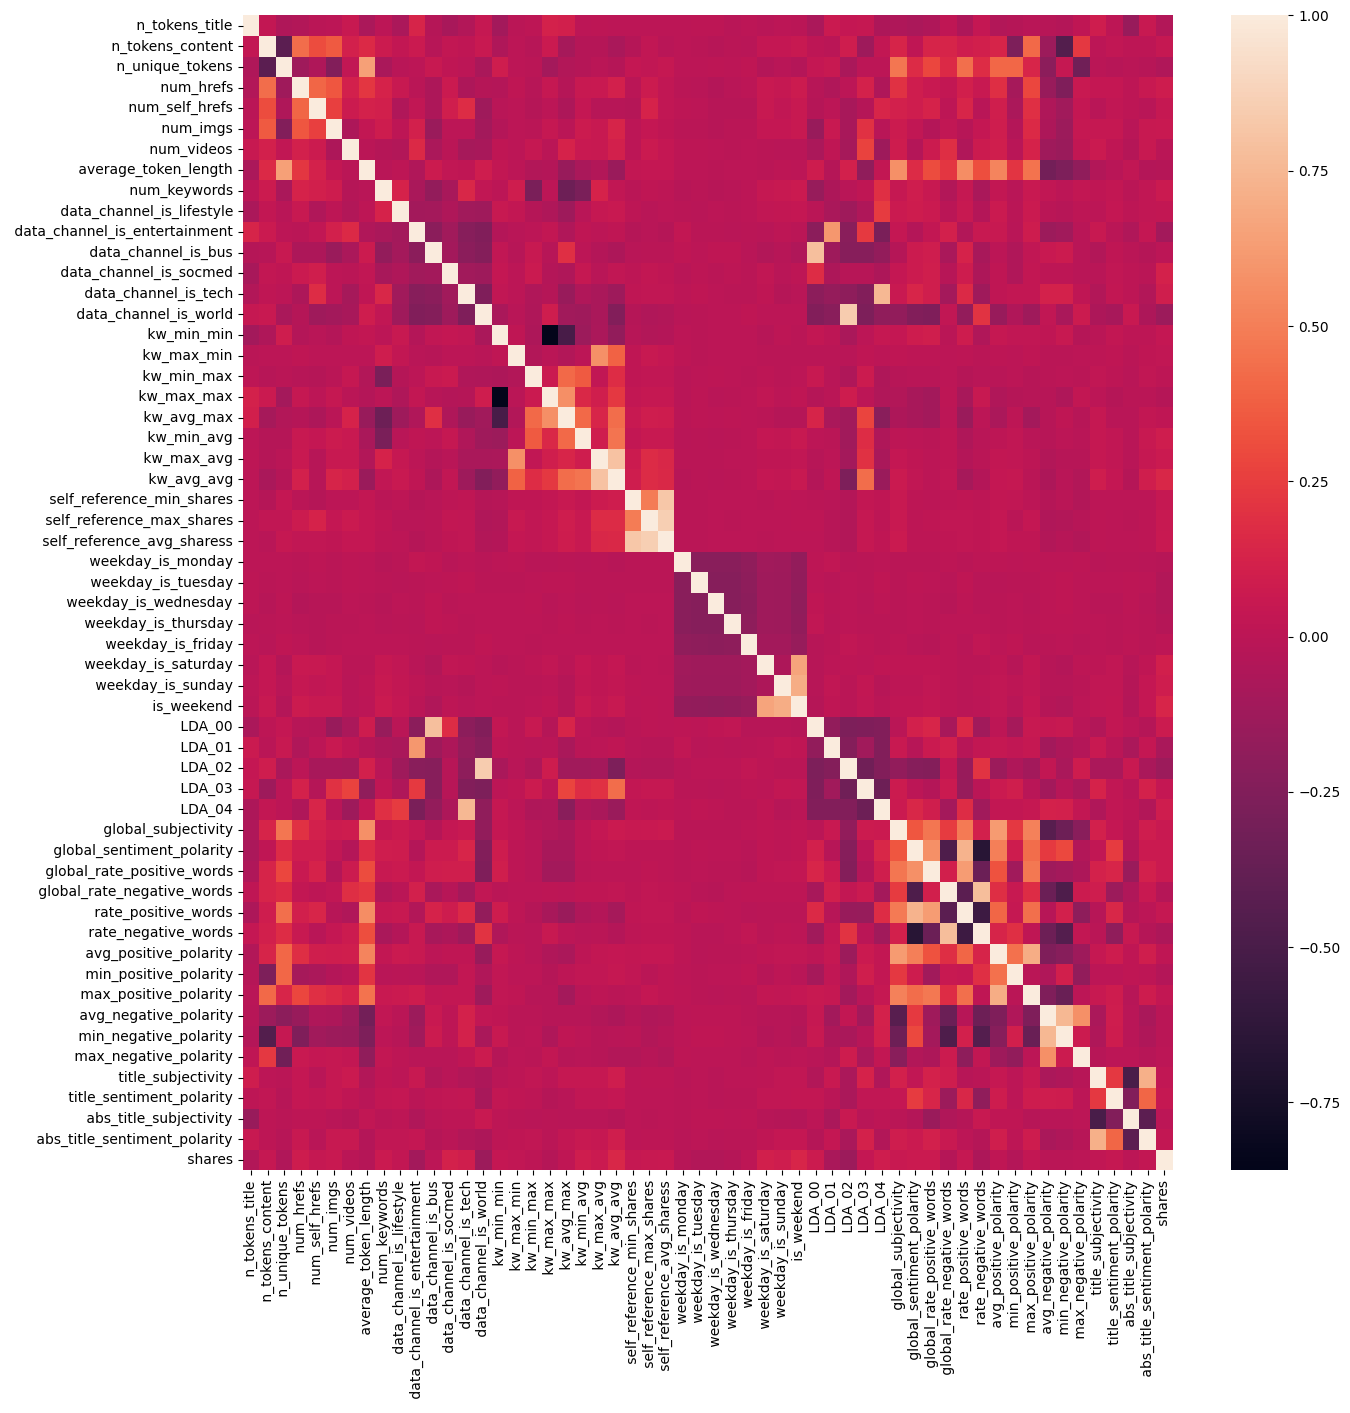

In [ ]:
corr=Data.corr()
fig=plt.figure(figsize=(15,15))
sns.heatmap(corr)

In [ ]:
Data.corr()
#highly_corr=Data.corr()>=0.80
#print(highly_corr)

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.031569,-0.056043,-0.042072,-0.006600,0.000518,0.052735,-0.067791,-0.001522,-0.070580,...,-0.025126,-0.013712,-0.018506,-0.034713,0.014306,0.084982,0.005281,-0.149260,0.048752,-0.042050
n_tokens_content,0.031569,1.000000,-0.416598,0.426989,0.303656,0.357074,0.107137,0.164262,0.070692,0.032286,...,-0.265268,0.417965,-0.137432,-0.456712,0.227250,0.003779,0.019752,0.010904,0.011489,0.047821
n_unique_tokens,-0.056043,-0.416598,1.000000,-0.121405,-0.059668,-0.246679,0.019867,0.643580,-0.074978,-0.010448,...,0.406762,0.138506,-0.204364,0.043886,-0.328148,-0.006015,-0.022272,-0.007195,-0.018025,-0.049100
num_hrefs,-0.042072,0.426989,-0.121405,1.000000,0.397668,0.343229,0.109066,0.218381,0.125892,0.055645,...,-0.090368,0.286219,-0.148775,-0.260927,0.058417,0.037902,0.035266,0.009212,0.050265,0.077652
num_self_hrefs,-0.006600,0.303656,-0.059668,0.397668,1.000000,0.252016,0.070527,0.118386,0.101544,-0.046152,...,-0.073678,0.186816,-0.055201,-0.117561,0.040353,-0.011508,0.024899,0.008665,-0.010459,0.043162
num_imgs,0.000518,0.357074,-0.246679,0.343229,0.252016,1.000000,-0.061229,0.027287,0.080925,0.008196,...,-0.034463,0.158222,-0.067512,-0.135326,0.047311,0.044340,0.044743,-0.009668,0.054453,0.055927
num_videos,0.052735,0.107137,0.019867,0.109066,0.070527,-0.061229,1.000000,-0.008242,-0.025914,-0.043296,...,-0.013930,0.124785,-0.118924,-0.141710,0.029729,0.063295,0.016383,-0.026341,0.053946,-0.002898
average_token_length,-0.067791,0.164262,0.643580,0.218381,0.118386,0.027287,-0.008242,1.000000,-0.015690,0.010936,...,0.211486,0.451383,-0.310572,-0.266008,-0.186990,-0.041050,-0.012960,0.026720,-0.036405,-0.025552
num_keywords,-0.001522,0.070692,-0.074978,0.125892,0.101544,0.080925,-0.025914,-0.015690,1.000000,0.123678,...,-0.016189,0.063048,0.023460,0.000669,0.027001,0.014299,0.029232,-0.009535,0.019581,0.065535
data_channel_is_lifestyle,-0.070580,0.032286,-0.010448,0.055645,-0.046152,0.008196,-0.043296,0.010936,0.123678,1.000000,...,-0.003067,0.068905,-0.007507,-0.022334,0.008892,0.004312,0.039278,0.005769,0.021136,0.031437


In [ ]:
mean1,median1=Data[' shares'].mean(),Data[' shares'].median()
print(mean1,median1)
weekdays=Data.columns.values[29:37]
print(weekdays)


1671.9726519100932 1300.0
[' weekday_is_thursday' ' weekday_is_friday' ' weekday_is_saturday'
 ' weekday_is_sunday' ' is_weekend' ' LDA_00' ' LDA_01' ' LDA_02']


In [ ]:
Data[' weekday_is_monday']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
39639    0.0
39640    0.0
39641    0.0
39642    0.0
39643    0.0
Name:  weekday_is_monday, Length: 35103, dtype: float64

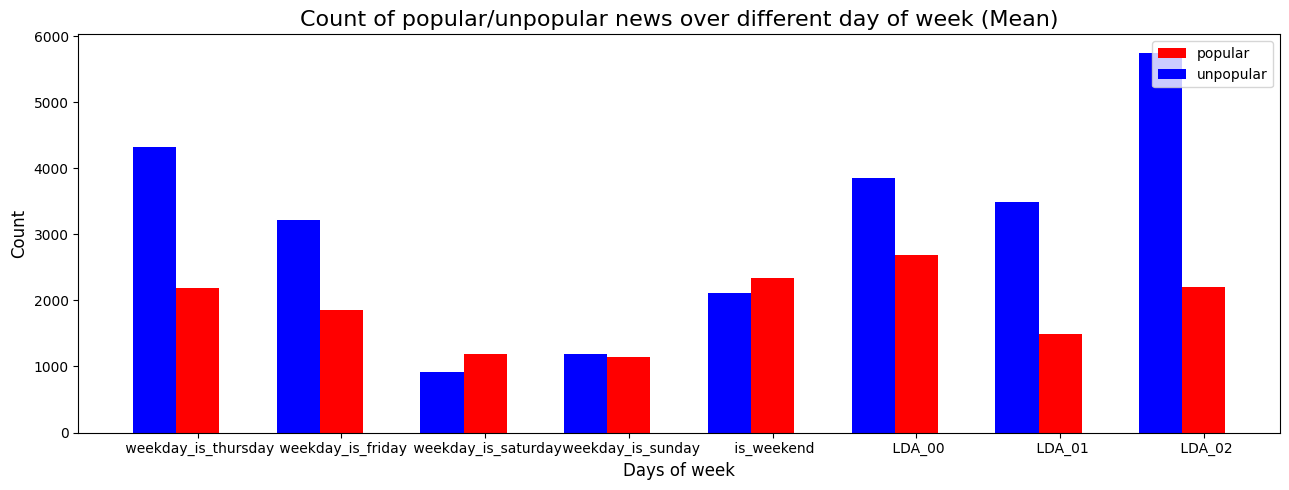

In [ ]:
unpopular1=Data[Data[' shares']<mean1]
popular1=Data[Data[' shares']>=mean1]
unpopday=unpopular1[weekdays].sum().values
popday=popular1[weekdays].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(weekdays)), popday, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(weekdays)) - 0.3,unpopday, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(weekdays)), weekdays)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cat = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',\
            ' average_token_length',' num_keywords',' self_reference_min_shares',' self_reference_max_shares',\
             ' self_reference_avg_sharess']
Data[num_cat]=scaler.fit_transform(Data[num_cat])
Data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.757876,-0.708421,0.663594,-0.611288,-0.337102,-0.412269,-0.299752,0.146840,-1.147422,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,-0.665214,-0.630618,0.604743,-0.704126,-0.596986,-0.412269,-0.299752,0.432391,-1.669123,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,-0.665214,-0.725710,0.575130,-0.704126,-0.596986,-0.412269,-0.299752,-0.204347,-0.625720,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,-0.665214,-0.034129,0.503788,-0.147095,-0.856870,-0.412269,-0.299752,-0.190237,-0.104019,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,1.232240,1.135076,0.415646,0.781289,4.080925,1.935901,-0.299752,0.149863,-0.104019,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Data[' shares'] = label_encoder.fit_transform(Data[' shares']>=1400)


In [ ]:
Data[' shares']
#Data.shape

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Name:  shares, Length: 35103, dtype: int64

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
Data4=Data
y=Data4[' shares']
X=Data4.drop([' shares'],axis=1)
poly=PolynomialFeatures(degree=2,include_bias=False)
polyfeatures=poly.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(polyfeatures,y,test_size=0.3,random_state=0)

In [ ]:
Data4.head()
X_train

array([[-0.19085085, -0.68032505,  0.72602739, ...,  0.01361111,
         0.00777778,  0.00444444],
       [-0.66521445, -0.33021208,  0.53984576, ...,  0.0625    ,
         0.0625    ,  0.0625    ],
       [ 0.28351276, -0.81864129,  0.6626506 , ...,  0.02040816,
         0.        ,  0.        ],
       ...,
       [-0.66521445, -0.47717308,  0.60681114, ...,  0.18777778,
         0.01444444,  0.00111111],
       [-0.19085085,  0.9038281 ,  0.48465608, ...,  0.01      ,
         0.0225    ,  0.050625  ],
       [ 0.75787637, -0.95263514,  0.70588235, ...,  0.25      ,
         0.        ,  0.        ]])

In [ ]:
y_train

3682     0
24128    0
19041    1
29014    1
9422     0
        ..
23648    0
36336    1
34478    0
24195    1
3018     1
Name:  shares, Length: 24572, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
poly_regmodel=LinearRegression()
poly_regmodel.fit(X_train,y_train)

LinearRegression()

In [ ]:
poly_reg_y_predicted = poly_regmodel.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse
#print('Accuracy: ',str(accuracy_score(y_test,poly_reg_y_predicted)))

0.48260297348087805

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train1, y_train1)
lin_reg_y_predicted = lin_reg_model.predict(X_test1)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test1, lin_reg_y_predicted))
lin_reg_rmse
#print('Accuracy: ',str(accuracy_score(y_test1,lin_reg_y_predicted)))

0.4700639406683154

In [ ]:
from sklearn.linear_model import Ridge
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)
rr=Ridge(alpha=1)
rr.fit(X_train2,y_train2)
pred_train_y=rr.predict(X_test2)
print(np.sqrt(mean_squared_error(y_test2,pred_train_y)))
#print('Accuracy: ',str(accuracy_score(y_test2,pred_train_y)))
pred_train_y

0.47011204881986596


array([0.4808062 , 0.79287694, 0.4467447 , ..., 0.32850972, 0.84983407,
       0.45760639])

In [ ]:
from sklearn.linear_model import PoissonRegressor
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)
poi_model=PoissonRegressor(alpha=1.0)
poi_model.fit(X_train3,y_train3)
poi_pred=poi_model.predict(X_test3)
print(np.sqrt(mean_squared_error(y_test3,poi_pred)))


0.4932582911332839


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=0)
log_class=LogisticRegression(random_state=0)
log_class.fit(X_train4,y_train4)
log_pred=log_class.predict(X_test4)
print(np.sqrt(mean_squared_error(y_test4,log_pred)))
print('Accuracy: ',str(accuracy_score(y_test4,log_pred)))
print(classification_report(y_test4,log_pred))

0.6526717695019268
Accuracy:  0.5740195612952236
              precision    recall  f1-score   support

           0       0.57      0.73      0.64      5538
           1       0.57      0.40      0.47      4993

    accuracy                           0.57     10531
   macro avg       0.57      0.57      0.56     10531
weighted avg       0.57      0.57      0.56     10531



In [ ]:
X_train4

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
3682,-0.190851,-0.680325,0.726027,-0.239934,-0.337102,-0.535857,2.476286,-0.168802,1.461084,0.0,...,0.471429,0.200000,1.000,-0.236905,-0.3,-0.125,0.616667,0.066667,0.116667,0.066667
24128,-0.665214,-0.330212,0.539846,0.131420,-0.856870,-0.412269,-0.299752,0.575229,0.417682,0.0,...,0.441305,0.033333,1.000,-0.375000,-0.5,-0.250,0.250000,0.250000,0.250000,0.250000
19041,0.283513,-0.818641,0.662651,-0.704126,-0.077218,-0.412269,-0.047385,-0.277805,-1.147422,0.0,...,0.533333,0.500000,0.600,0.000000,0.0,0.000,0.357143,0.000000,0.142857,0.000000
29014,0.283513,-0.252409,0.554745,-0.425611,-0.856870,-0.412269,-0.047385,-0.036869,1.461084,0.0,...,0.495833,0.100000,1.000,-0.179444,-0.3,-0.050,0.300000,0.400000,0.200000,0.400000
9422,0.757876,-0.196218,0.508850,-0.611288,0.182666,0.823610,-0.299752,0.371587,0.939383,0.0,...,0.270455,0.050000,0.700,-0.205556,-0.4,-0.050,0.227273,0.068182,0.272727,0.068182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23648,0.757876,0.765512,0.431688,0.781289,3.821041,2.801016,-0.299752,0.262266,0.939383,0.0,...,0.295686,0.050000,1.000,-0.155655,-0.4,-0.050,0.300000,0.200000,0.200000,0.200000
36336,-0.190851,-0.758128,0.608247,-0.611288,-0.596986,-0.535857,-0.047385,-0.055134,-0.104019,0.0,...,0.208182,0.100000,0.500,-0.200000,-0.2,-0.200,0.000000,0.000000,0.500000,0.000000
34478,-0.665214,-0.477173,0.606811,0.038582,-0.077218,-0.412269,0.457349,0.414094,0.939383,0.0,...,0.402336,0.033333,1.000,-0.167619,-0.5,-0.050,0.066667,0.033333,0.433333,0.033333
24195,-0.190851,0.903828,0.484656,0.502774,-0.856870,-0.412269,-0.299752,0.278015,0.939383,1.0,...,0.363859,0.062500,1.000,-0.267071,-1.0,-0.100,0.600000,0.225000,0.100000,0.225000


In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
X_train5=pca.fit_transform(X_train4)
X_test5=pca.transform(X_test4)

In [ ]:
X_test5

array([[ 7.03983123e+05,  7.32005927e+04, -6.83833417e+03, ...,
        -5.86727297e-13, -4.48639669e-12, -4.98744503e-12],
       [ 1.64663137e+05, -3.93821976e+04,  6.31172437e+03, ...,
         4.79506679e-13, -3.29593379e-12, -2.71145284e-12],
       [-1.43605621e+05,  8.56528055e+04, -4.32774715e+04, ...,
        -3.31780710e-14,  3.89973739e-12,  5.42958538e-12],
       ...,
       [ 7.50634452e+04, -1.95093662e+04, -4.68520581e+03, ...,
        -1.40747515e-13, -1.79858285e-12, -1.07711706e-12],
       [-7.74329192e+04, -5.26655896e+04,  3.57785357e+03, ...,
        -1.37029450e-13, -1.40945372e-12, -6.53987350e-13],
       [-1.34603515e+05,  7.06257014e+04, -1.84442046e+04, ...,
         4.00989942e-13,  3.96798562e-12,  3.67746413e-12]])

In [ ]:
newlog_model=LogisticRegression(random_state=0)
newlog_model.fit(X_train5,y_train4)
newlog_pred=newlog_model.predict(X_test5)
print(np.sqrt(mean_squared_error(y_test4,newlog_pred)))
print('Accuracy: ',str(accuracy_score(y_test4,newlog_pred)))
print(classification_report(y_test4,newlog_pred))

0.6439568830225355
Accuracy:  0.5853195328079005
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      5538
           1       0.57      0.52      0.55      4993

    accuracy                           0.59     10531
   macro avg       0.58      0.58      0.58     10531
weighted avg       0.58      0.59      0.58     10531



In [ ]:
newlog_pred

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
Data

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.757876,-0.708421,0.663594,-0.611288,-0.337102,-0.412269,-0.299752,0.146840,-1.147422,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,-0.665214,-0.630618,0.604743,-0.704126,-0.596986,-0.412269,-0.299752,0.432391,-1.669123,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,-0.665214,-0.725710,0.575130,-0.704126,-0.596986,-0.412269,-0.299752,-0.204347,-0.625720,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,-0.665214,-0.034129,0.503788,-0.147095,-0.856870,-0.412269,-0.299752,-0.190237,-0.104019,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,1.232240,1.135076,0.415646,0.781289,4.080925,1.935901,-0.299752,0.149863,-0.104019,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.283513,-0.433949,0.529052,-0.147095,0.962318,-0.412269,-0.047385,-0.045571,0.417682,0.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1
39640,0.757876,-0.472851,0.696296,-0.147095,0.962318,-0.165094,11.813868,-0.189513,-0.104019,0.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1
39641,-0.190851,-0.226475,0.516355,1.245482,-0.596986,0.947197,-0.047385,0.632087,0.417682,0.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1
39642,-2.088305,0.292211,0.539493,-0.054257,-0.596986,-0.412269,-0.299752,0.507459,-1.147422,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,0


In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
log2=LogisticRegression(random_state=0)
sfs=SequentialFeatureSelector(log2,k_features=(1,55),forward=False,scoring='accuracy',cv=9)
sfs.fit(X_train4,y_train4)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

SequentialFeatureSelector(cv=9, estimator=LogisticRegression(random_state=0),
                          forward=False, k_features=(1, 55),
                          scoring='accuracy')

In [ ]:
sfs.k_feature_names_
sfs.k_score_

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
55,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5756133284511168, 0.5789088246063713, 0.581...",0.576835,"( n_tokens_title, n_tokens_content, n_unique...",0.004561,0.005703,0.002016
54,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5770779934090077, 0.5781764921274258, 0.580...",0.578016,"( n_tokens_title, n_tokens_content, n_unique...",0.004359,0.005451,0.001927
53,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5759794946905895, 0.5789088246063713, 0.581...",0.57769,"( n_tokens_title, n_tokens_content, n_unique...",0.004226,0.005284,0.001868
52,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5759794946905895, 0.579274990845844, 0.5813...",0.577975,"( n_tokens_title, n_tokens_content, n_unique...",0.004378,0.005474,0.001935
51,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5759794946905895, 0.5789088246063713, 0.581...",0.577649,"( n_tokens_title, n_tokens_content, n_unique...",0.004247,0.005311,0.001878
50,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5759794946905895, 0.5789088246063713, 0.581...",0.577975,"( n_tokens_title, n_tokens_content, n_unique...",0.00432,0.005401,0.00191
49,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5774441596484804, 0.5789088246063713, 0.584...",0.577853,"( n_tokens_title, n_tokens_content, n_unique...",0.004567,0.005711,0.002019
48,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5774441596484804, 0.5781764921274258, 0.584...",0.577649,"( n_tokens_title, n_tokens_content, n_unique...",0.004675,0.005845,0.002066
47,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5770779934090077, 0.579274990845844, 0.5846...",0.577853,"( n_tokens_title, n_tokens_content, n_unique...",0.004578,0.005724,0.002024
46,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5770779934090077, 0.579274990845844, 0.5846...",0.57769,"( n_tokens_title, n_tokens_content, n_unique...",0.004768,0.005962,0.002108


In [ ]:
sfscolumns=[' n_tokens_title',
 ' n_tokens_content',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_socmed',
 ' kw_min_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_max_shares',
 ' weekday_is_tuesday',
 ' weekday_is_thursday',
 ' weekday_is_saturday',
 ' LDA_00',
 ' LDA_02',
 ' LDA_03',
 ' rate_negative_words',
 ' max_positive_polarity',
 ' title_sentiment_polarity',' shares']
NewData=Data[sfscolumns]
NewData.head()
y1=NewData[' shares']
X1=NewData.drop([' shares'],axis=1)

In [ ]:
X1

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,kw_min_min,kw_min_max,...,self_reference_max_shares,weekday_is_tuesday,weekday_is_thursday,weekday_is_saturday,LDA_00,LDA_02,LDA_03,rate_negative_words,max_positive_polarity,title_sentiment_polarity
0,0.757876,-0.708421,-0.611288,-0.337102,-0.412269,0.0,1.0,0.0,0.0,0.0,...,-0.229961,0.0,0.0,0.0,0.500331,0.040005,0.041263,0.230769,0.70,-0.187500
1,-0.665214,-0.630618,-0.704126,-0.596986,-0.412269,0.0,0.0,0.0,0.0,0.0,...,-0.242540,0.0,0.0,0.0,0.799756,0.050096,0.050101,0.266667,0.70,0.000000
2,-0.665214,-0.725710,-0.704126,-0.596986,-0.412269,0.0,0.0,0.0,0.0,0.0,...,-0.219258,0.0,0.0,0.0,0.217792,0.033351,0.033334,0.142857,1.00,0.000000
3,-0.665214,-0.034129,-0.147095,-0.856870,-0.412269,0.0,1.0,0.0,0.0,0.0,...,-0.242540,0.0,0.0,0.0,0.028573,0.494651,0.028905,0.333333,0.80,0.000000
4,1.232240,1.135076,0.781289,4.080925,1.935901,0.0,0.0,0.0,0.0,0.0,...,0.163245,0.0,0.0,0.0,0.028633,0.028575,0.028572,0.139785,1.00,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.283513,-0.433949,-0.147095,0.962318,-0.412269,0.0,0.0,0.0,-1.0,26900.0,...,0.974814,0.0,0.0,0.0,0.025038,0.151701,0.025000,0.277778,0.75,0.000000
39640,0.757876,-0.472851,-0.147095,0.962318,-0.165094,0.0,0.0,1.0,-1.0,6500.0,...,-0.189281,0.0,0.0,0.0,0.029349,0.231866,0.681635,0.187500,0.70,1.000000
39641,-0.190851,-0.226475,1.245482,-0.596986,0.947197,0.0,0.0,0.0,-1.0,6200.0,...,-0.207034,0.0,0.0,0.0,0.159004,0.025207,0.643794,0.423077,0.50,0.136364
39642,-2.088305,0.292211,-0.054257,-0.596986,-0.412269,0.0,0.0,0.0,-1.0,0.0,...,-0.231077,0.0,0.0,0.0,0.040004,0.839987,0.040002,0.533333,0.50,0.000000


In [ ]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X1, y1, test_size=0.3, random_state=0)
sfslog=LogisticRegression(random_state=0)
sfslog.fit(X_train6,y_train6)
sfslogpred=sfslog.predict(X_test6)
print('RMSE:',np.sqrt(mean_squared_error(y_test6,sfslogpred)))
print('Accuracy: ',str(accuracy_score(y_test6,sfslogpred)))
print(classification_report(y_test6,sfslogpred))

RMSE: 0.6528172440985183
Accuracy:  0.5738296458076156
              precision    recall  f1-score   support

           0       0.57      0.73      0.64      5538
           1       0.57      0.40      0.47      4993

    accuracy                           0.57     10531
   macro avg       0.57      0.57      0.56     10531
weighted avg       0.57      0.57      0.56     10531



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, test_size=0.3, random_state=0)
etcmodel=ExtraTreesClassifier(n_estimators=10,random_state=0)
sfs2=SequentialFeatureSelector(etcmodel,k_features=(20,55),forward=False,scoring='accuracy',cv=9)
sfs2=sfs2.fit(X_train7,y_train7)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
X_test7

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
2930,-1.613942,-0.332373,0.544757,-0.704126,-0.337102,-0.412269,-0.047385,-0.062966,-1.147422,1.0,...,0.415530,0.100000,0.6,-0.277778,-0.50,-0.0500,0.00,0.000,0.50,0.000
3918,-0.665214,-0.963441,0.792079,-0.518449,-0.337102,-0.535857,-0.299752,0.307769,1.461084,0.0,...,0.252814,0.033333,0.5,-0.228125,-0.50,-0.1000,0.50,0.375,0.00,0.375
10239,1.232240,-0.773256,0.682796,-0.611288,-0.337102,-0.535857,-0.047385,0.337256,1.461084,0.0,...,0.530556,0.250000,1.0,-0.050000,-0.05,-0.0500,0.40,-0.050,0.10,0.050
16072,-0.190851,0.741739,0.425799,-0.054257,0.442550,-0.412269,-0.299752,-0.497328,0.417682,1.0,...,0.393428,0.100000,1.0,-0.175496,-0.40,-0.0500,0.00,0.000,0.50,0.000
25225,1.706604,1.934716,0.388850,-0.147095,0.442550,-0.288682,-0.299752,0.045786,0.939383,0.0,...,0.358214,0.033333,0.8,-0.238702,-1.00,-0.0500,0.75,0.300,0.25,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24304,-0.190851,-0.613328,0.604000,0.317097,-0.077218,0.823610,-0.299752,0.016863,0.939383,0.0,...,0.414815,0.100000,0.7,-0.731944,-1.00,-0.1875,1.00,-1.000,0.50,1.000
5463,-0.665214,-0.680325,0.682609,-0.611288,-0.337102,-0.412269,-0.299752,-0.147704,-2.190824,0.0,...,0.344156,0.050000,0.7,-0.295238,-0.80,-0.0500,0.65,0.350,0.15,0.350
5827,-0.665214,0.320306,0.480463,-0.796965,-0.596986,-0.412269,-0.299752,0.104842,-0.104019,0.0,...,0.336615,0.062500,1.0,-0.173990,-0.40,-0.0500,0.00,0.000,0.50,0.000
10930,-1.139578,0.625034,0.513682,1.709674,6.159997,-0.412269,-0.299752,0.226194,1.461084,0.0,...,0.463591,0.033333,1.0,-0.147262,-0.40,-0.0250,0.25,0.250,0.25,0.250


In [ ]:
etcmodel.fit(X_train7,y_train7)
etcmodelpred=etcmodel.predict(X_test7)
print('RMSE:',np.sqrt(mean_squared_error(y_test7,etcmodelpred)))
print('Accuracy: ',str(accuracy_score(y_test7,etcmodelpred)))
print(classification_report(y_test7,etcmodelpred))

RMSE: 0.5925021340412325
Accuracy:  0.6489412211565854
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      5538
           1       0.65      0.57      0.61      4993

    accuracy                           0.65     10531
   macro avg       0.65      0.65      0.64     10531
weighted avg       0.65      0.65      0.65     10531



In [ ]:
sfs2.k_feature_names_
#sfs2.k_score_

In [ ]:
sfscolumns2=[' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_max',
 ' weekday_is_tuesday',
 ' weekday_is_friday',
 ' is_weekend',' shares']
NewData2=Data[sfscolumns2]
NewData2.head()
y2=NewData2[' shares']
X2=NewData2.drop([' shares'],axis=1)

In [ ]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(X2, y2, test_size=0.3, random_state=0)
sfsetc=ExtraTreesClassifier(n_estimators=60,random_state=0)
sfsetc.fit(X_train8,y_train8)
sfsetcpred=sfsetc.predict(X_test8)
print('RMSE:',np.sqrt(mean_squared_error(y_test8,sfsetcpred)))
print('Accuracy: ',str(accuracy_score(y_test8,sfsetcpred)))
print(classification_report(y_test8,sfsetcpred))

RMSE: 0.6193014833054941
Accuracy:  0.6164656727756148
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      5538
           1       0.60      0.59      0.59      4993

    accuracy                           0.62     10531
   macro avg       0.62      0.62      0.62     10531
weighted avg       0.62      0.62      0.62     10531



In [ ]:
from sklearn.feature_selection import RFECV
reflog=LogisticRegression(random_state=0)
rfecv1=RFECV(estimator=reflog,step=1,cv=9,scoring='accuracy')
rfecv1.fit(X_train4,y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFECV(cv=9, estimator=LogisticRegression(random_state=0), scoring='accuracy')

In [ ]:
rfecv1.support_
Data4.columns[:-1][rfecv1.support_]
#rfecv1.ranking_

Index([' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_keywords', ' data_channel_is_entertainment',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' is_weekend', ' LDA_04'],
      dtype='object')

In [ ]:
rfe1_columns=[' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_keywords', ' data_channel_is_entertainment',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' is_weekend', ' LDA_04',' shares']
NewData2=Data[rfe1_columns]
NewData2.head()
y3=NewData2[' shares']
X3=NewData2.drop([' shares'],axis=1)

In [ ]:
X3

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_keywords,data_channel_is_entertainment,data_channel_is_tech,data_channel_is_world,kw_min_min,...,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_04
0,0.757876,-0.708421,-0.611288,-0.337102,-0.412269,-1.147422,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,-0.163378,-0.229961,-0.229412,0.0,0.040123
1,-0.665214,-0.630618,-0.704126,-0.596986,-0.412269,-1.669123,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,-0.189403,-0.242540,-0.250618,0.0,0.050001
2,-0.665214,-0.725710,-0.704126,-0.596986,-0.412269,-0.625720,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,-0.141236,-0.219258,-0.211369,0.0,0.682188
3,-0.665214,-0.034129,-0.147095,-0.856870,-0.412269,-0.104019,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,-0.189403,-0.242540,-0.250618,0.0,0.028572
4,1.232240,1.135076,0.781289,4.080925,1.935901,-0.104019,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,-0.160807,0.163245,-0.115891,0.0,0.885427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.283513,-0.433949,-0.147095,0.962318,-0.412269,0.417682,0.0,1.0,0.0,-1.0,...,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,0.408753,0.974814,1.332733,0.0,0.773260
39640,0.757876,-0.472851,-0.147095,0.962318,-0.165094,-0.104019,0.0,0.0,0.0,-1.0,...,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,-0.079216,-0.189281,-0.160833,0.0,0.028575
39641,-0.190851,-0.226475,1.245482,-0.596986,0.947197,0.417682,0.0,0.0,0.0,-1.0,...,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,-0.115945,-0.207034,-0.190762,0.0,0.146970
39642,-2.088305,0.292211,-0.054257,-0.596986,-0.412269,-1.147422,0.0,0.0,1.0,-1.0,...,843300.0,254600.000000,0.000000,3384.316871,1777.895883,-0.165687,-0.231077,-0.231293,0.0,0.040004


In [ ]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(X3, y3, test_size=0.3, random_state=0)
rfe_logis=LogisticRegression(random_state=0)
rfe_logis.fit(X_train9,y_train9)
rfe_logispred=rfe_logis.predict(X_test9)
print('RMSE:',np.sqrt(mean_squared_error(y_test9,rfe_logispred)))
print('Accuracy: ',str(accuracy_score(y_test9,rfe_logispred)))
print(classification_report(y_test9,rfe_logispred))

RMSE: 0.6533988185961285
Accuracy:  0.5730699838571836
              precision    recall  f1-score   support

           0       0.57      0.73      0.64      5538
           1       0.57      0.40      0.47      4993

    accuracy                           0.57     10531
   macro avg       0.57      0.56      0.56     10531
weighted avg       0.57      0.57      0.56     10531



In [ ]:
rfe_etc=ExtraTreesClassifier(n_estimators=60,random_state=0)
rfecv2=RFECV(estimator=rfe_etc,step=1,cv=9,scoring='accuracy')
rfecv2.fit(X_train7,y_train7)

RFECV(cv=9, estimator=ExtraTreesClassifier(n_estimators=60, random_state=0),
      scoring='accuracy')

In [ ]:
rfecv2.support_
Data4.columns[:-1][rfecv2.support_]
#rfecv1.ranking_

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords',
       ' data_channel_is_entertainment', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarit

In [ ]:
rfe2_columns=[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords',
       ' data_channel_is_entertainment', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', ' abs_title_sentiment_polarity',' shares']
NewData3=Data[rfe2_columns]

y4=NewData3[' shares']
X4=NewData3.drop([' shares'],axis=1)
X4

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_entertainment,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.757876,-0.708421,0.663594,-0.611288,-0.337102,-0.412269,-0.299752,0.146840,-1.147422,1.0,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,-0.665214,-0.630618,0.604743,-0.704126,-0.596986,-0.412269,-0.299752,0.432391,-1.669123,0.0,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,-0.665214,-0.725710,0.575130,-0.704126,-0.596986,-0.412269,-0.299752,-0.204347,-0.625720,0.0,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,-0.665214,-0.034129,0.503788,-0.147095,-0.856870,-0.412269,-0.299752,-0.190237,-0.104019,1.0,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,1.232240,1.135076,0.415646,0.781289,4.080925,1.935901,-0.299752,0.149863,-0.104019,0.0,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.283513,-0.433949,0.529052,-0.147095,0.962318,-0.412269,-0.047385,-0.045571,0.417682,0.0,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,0.757876,-0.472851,0.696296,-0.147095,0.962318,-0.165094,11.813868,-0.189513,-0.104019,0.0,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,-0.190851,-0.226475,0.516355,1.245482,-0.596986,0.947197,-0.047385,0.632087,0.417682,0.0,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,-2.088305,0.292211,0.539493,-0.054257,-0.596986,-0.412269,-0.299752,0.507459,-1.147422,0.0,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [ ]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(X4, y4, test_size=0.3, random_state=0)
rfeetcmod=ExtraTreesClassifier(n_estimators=60,random_state=0)
rfeetcmod.fit(X_train10,y_train10)
rfeetcpred=rfeetcmod.predict(X_test10)
print('RMSE:',np.sqrt(mean_squared_error(y_test10,rfeetcpred)))
print('Accuracy: ',str(accuracy_score(y_test10,rfeetcpred)))
print(classification_report(y_test10,rfeetcpred))

RMSE: 0.5957785212135286
Accuracy:  0.6450479536606211
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      5538
           1       0.64      0.57      0.61      4993

    accuracy                           0.65     10531
   macro avg       0.64      0.64      0.64     10531
weighted avg       0.64      0.65      0.64     10531

